<a href="https://colab.research.google.com/github/zsazsa123/Python-Project3/blob/master/Shena_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Shena Khan


In [18]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
sns.set(style="whitegrid", color_codes=True)

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go



Data Loading and Cleaning

In [19]:
# Import Violation Data from GitHub
dfexcel= pd.read_excel('https://raw.githubusercontent.com/ArsenioMGonzalez3/Project3_ABDS/master/Open%20Parking%20and%20Camera%20Violations_OH%20NY_2019_2020%20YTD.xlsx')


In [20]:
# Get information on columns of the data loaded.
dfexcel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61627 entries, 0 to 61626
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Plate                61627 non-null  object        
 1   State                61627 non-null  object        
 2   License Type         61627 non-null  object        
 3   Summons Number       61627 non-null  int64         
 4   Issue Date           61627 non-null  datetime64[ns]
 5   Violation Time       61622 non-null  object        
 6   Violation            61626 non-null  object        
 7   Judgment Entry Date  1223 non-null   datetime64[ns]
 8   Fine Amount          61627 non-null  int64         
 9   Penalty Amount       61627 non-null  int64         
 10  Interest Amount      61627 non-null  float64       
 11  Reduction Amount     61627 non-null  float64       
 12  Payment Amount       61627 non-null  float64       
 13  Amount Due           61627 non-

In [21]:
dfexcel.head()


,Plate,State,License Type,Summons Number,Issue Date,Violation Time,Violation,Judgment Entry Date,Fine Amount,Penalty Amount,Interest Amount,Reduction Amount,Payment Amount,Amount Due,Precinct,County,Issuing Agency,Violation Status,Summons Image
0,T779796C,NY,OMT,4010739587,2019-03-11,07:58A,BUS LANE VIOLATION,2019-09-05,115,25,0.89,0.0,140.89,0.0,0,BX,DEPARTMENT OF TRANSPORTATION,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
1,GPV1104,NY,PAS,4681390719,2020-03-17,03:43P,PHTO SCHOOL ZN SPEED VIOLATION,NaT,50,0,0.00,0.0,0.00,50.0,0,BK,DEPARTMENT OF TRANSPORTATION,HEARING PENDING,View Summons (http://nycserv.nyc.gov/NYCServWe...
2,T718661C,NY,OMT,4687842677,2020-04-21,07:18P,PHTO SCHOOL ZN SPEED VIOLATION,NaT,50,0,0.00,0.0,50.00,0.0,0,QN,DEPARTMENT OF TRANSPORTATION,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...
3,HRR5155,NY,PAS,4681391645,2020-03-17,03:48P,PHTO SCHOOL ZN SPEED VIOLATION,NaT,50,0,0.00,0.0,0.00,50.0,0,BK,DEPARTMENT OF TRANSPORTATION,HEARING PENDING,View Summons (http://nycserv.nyc.gov/NYCServWe...
4,GSL3431,NY,PAS,4681391694,2020-03-17,03:49P,PHTO SCHOOL ZN SPEED VIOLATION,NaT,50,0,0.00,0.0,0.00,50.0,0,BK,DEPARTMENT OF TRANSPORTATION,HEARING PENDING,View Summons (http://nycserv.nyc.gov/NYCServWe...


### Making Data Uniform & Creating new field
*italicized text*

In [22]:
c_dictionary = { 'K' : "Brooklyn", 'BK' : "Brooklyn", 'Q' : "Queens", 'QN' : "Queens",
                 'NY' : "Manhattan", 'MN' : "Manhattan", 'R' : "Staten Island", 'ST' : "Staten Island",
                 'BX' : "Bronx", '' : "Blank"}

dfexcel['Borough'] = dfexcel['County'].map(c_dictionary)

## Creating new fields from old fields.

> Indented block



In [23]:
#Creating a count of records so it can be used in any calculations 
dfexcel['Count'] = 1

#Parsing out Year and Month from the "Issue Date" Column using DatetimeIndex
dfexcel['Year'] = pd.DatetimeIndex(dfexcel['Issue Date']).year
dfexcel['Month'] = pd.DatetimeIndex(dfexcel['Issue Date']).month



In [25]:
# Change the format for Year and Month into a String
dfexcel['Year']= dfexcel['Year'].astype(str)
dfexcel['Month']= dfexcel['Month'].astype(str)


In [27]:
# In order to get the total amount of the fine we need to sum all of the columns that hold amounts related to the fine.
    # 'Fine Amount' + 'Penalty Amount' + 'Interest Amount' + 'Reduction Amount'

dfexcel['Total_Fine']= dfexcel['Fine Amount'] + dfexcel['Penalty Amount'] + dfexcel['Interest Amount'] + dfexcel['Reduction Amount']

dfexcel.head()

,Plate,State,License Type,Summons Number,Issue Date,Violation Time,Violation,Judgment Entry Date,Fine Amount,Penalty Amount,Interest Amount,Reduction Amount,Payment Amount,Amount Due,Precinct,County,Issuing Agency,Violation Status,Summons Image,Borough,Count,Year,Month,Total_Fine
0,T779796C,NY,OMT,4010739587,2019-03-11,07:58A,BUS LANE VIOLATION,2019-09-05,115,25,0.89,0.0,140.89,0.0,0,BX,DEPARTMENT OF TRANSPORTATION,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...,Bronx,1,2019,3,140.89
1,GPV1104,NY,PAS,4681390719,2020-03-17,03:43P,PHTO SCHOOL ZN SPEED VIOLATION,NaT,50,0,0.00,0.0,0.00,50.0,0,BK,DEPARTMENT OF TRANSPORTATION,HEARING PENDING,View Summons (http://nycserv.nyc.gov/NYCServWe...,Brooklyn,1,2020,3,50.00
2,T718661C,NY,OMT,4687842677,2020-04-21,07:18P,PHTO SCHOOL ZN SPEED VIOLATION,NaT,50,0,0.00,0.0,50.00,0.0,0,QN,DEPARTMENT OF TRANSPORTATION,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...,Queens,1,2020,4,50.00
3,HRR5155,NY,PAS,4681391645,2020-03-17,03:48P,PHTO SCHOOL ZN SPEED VIOLATION,NaT,50,0,0.00,0.0,0.00,50.0,0,BK,DEPARTMENT OF TRANSPORTATION,HEARING PENDING,View Summons (http://nycserv.nyc.gov/NYCServWe...,Brooklyn,1,2020,3,50.00
4,GSL3431,NY,PAS,4681391694,2020-03-17,03:49P,PHTO SCHOOL ZN SPEED VIOLATION,NaT,50,0,0.00,0.0,0.00,50.0,0,BK,DEPARTMENT OF TRANSPORTATION,HEARING PENDING,View Summons (http://nycserv.nyc.gov/NYCServWe...,Brooklyn,1,2020,3,50.00


## Top 5 Violation by Sum of Total Fine Amount

In [28]:
# Group the data and sum the Count of vilotaions and the Total Fine
df_Group_V= dfexcel.groupby(['Violation']).agg(
    
    Count=('Count', sum),
    
    Total_Fine=('Total_Fine', sum)
    
    )
# To create index
df_Group_V = df_Group_V.reset_index()
df_Group_V.head()


,Violation,Count,Total_Fine
0,ANGLE PARKING,21,1594.09
1,ANGLE PARKING-COMM VEHICLE,1,115.00
2,BEYOND MARKED SPACE,24,2031.67
3,BIKE LANE,622,91474.46
4,BUS LANE VIOLATION,525,52623.59


In [29]:
# Sort the column Total Fine in decensing order using the sort_values function
df_Group_S=df_Group_V.sort_values(by='Total_Fine', ascending=False)
df_Group_S = df_Group_S.reset_index()
df_Group_S.head()

,index,Violation,Count,Total_Fine
0,60,PHTO SCHOOL ZN SPEED VIOLATION,21587,1109578.03
1,10,DOUBLE PARKING,5324,1071073.74
2,42,NO STANDING-DAY/TIME LIMITS,6157,897778.69
3,35,NO PARKING-STREET CLEANING,3718,317364.17
4,31,NO PARKING-DAY/TIME LIMITS,2844,303491.06


In [30]:
# Create a list containing the Top 5 Violations
top_5_list = df_Group_S['Violation'].tolist()
top_5_list = top_5_list[:5]
top_5_list


['PHTO SCHOOL ZN SPEED VIOLATION',
 'DOUBLE PARKING',
 'NO STANDING-DAY/TIME LIMITS',
 'NO PARKING-STREET CLEANING',
 'NO PARKING-DAY/TIME LIMITS']

Using the lambda function to create the "Top_5" column. 
The function states for every record in column "Violation" check if the value is in the list "top_5_list". If so, then place "Top_5" in the "Top_5" column; for all other records leave blank. 

In [31]:
dfexcel['Top_List'] = dfexcel['Violation'].apply(lambda x: 'Top_5' if x in top_5_list else '')
dfexcel.head()

,Plate,State,License Type,Summons Number,Issue Date,Violation Time,Violation,Judgment Entry Date,Fine Amount,Penalty Amount,Interest Amount,Reduction Amount,Payment Amount,Amount Due,Precinct,County,Issuing Agency,Violation Status,Summons Image,Borough,Count,Year,Month,Total_Fine,Top_List
0,T779796C,NY,OMT,4010739587,2019-03-11,07:58A,BUS LANE VIOLATION,2019-09-05,115,25,0.89,0.0,140.89,0.0,0,BX,DEPARTMENT OF TRANSPORTATION,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...,Bronx,1,2019,3,140.89,
1,GPV1104,NY,PAS,4681390719,2020-03-17,03:43P,PHTO SCHOOL ZN SPEED VIOLATION,NaT,50,0,0.00,0.0,0.00,50.0,0,BK,DEPARTMENT OF TRANSPORTATION,HEARING PENDING,View Summons (http://nycserv.nyc.gov/NYCServWe...,Brooklyn,1,2020,3,50.00,Top_5
2,T718661C,NY,OMT,4687842677,2020-04-21,07:18P,PHTO SCHOOL ZN SPEED VIOLATION,NaT,50,0,0.00,0.0,50.00,0.0,0,QN,DEPARTMENT OF TRANSPORTATION,HEARING HELD-GUILTY,View Summons (http://nycserv.nyc.gov/NYCServWe...,Queens,1,2020,4,50.00,Top_5
3,HRR5155,NY,PAS,4681391645,2020-03-17,03:48P,PHTO SCHOOL ZN SPEED VIOLATION,NaT,50,0,0.00,0.0,0.00,50.0,0,BK,DEPARTMENT OF TRANSPORTATION,HEARING PENDING,View Summons (http://nycserv.nyc.gov/NYCServWe...,Brooklyn,1,2020,3,50.00,Top_5
4,GSL3431,NY,PAS,4681391694,2020-03-17,03:49P,PHTO SCHOOL ZN SPEED VIOLATION,NaT,50,0,0.00,0.0,0.00,50.0,0,BK,DEPARTMENT OF TRANSPORTATION,HEARING PENDING,View Summons (http://nycserv.nyc.gov/NYCServWe...,Brooklyn,1,2020,3,50.00,Top_5


In [32]:
# Group the data and sum the Count of vilotaions and the Total Fine
df_Group_A= dfexcel.groupby(['Violation', 'Borough', 'Top_List', 'Year']).agg(

    Count=('Count', sum),
    
    Total_Fine=('Total_Fine', sum)
    )
df_Group_A = df_Group_A.reset_index()
df_Group_A.head()

,Violation,Borough,Top_List,Year,Count,Total_Fine
0,ANGLE PARKING,Bronx,,2019,2,200.00
1,ANGLE PARKING,Bronx,,2020,1,45.00
2,ANGLE PARKING,Brooklyn,,2019,7,585.00
3,ANGLE PARKING,Manhattan,,2019,4,303.99
4,ANGLE PARKING,Queens,,2019,5,295.10


# Visualization

(array([   0., 1000., 2000., 3000., 4000., 5000.]),
 <a list of 6 Text major ticklabel objects>)

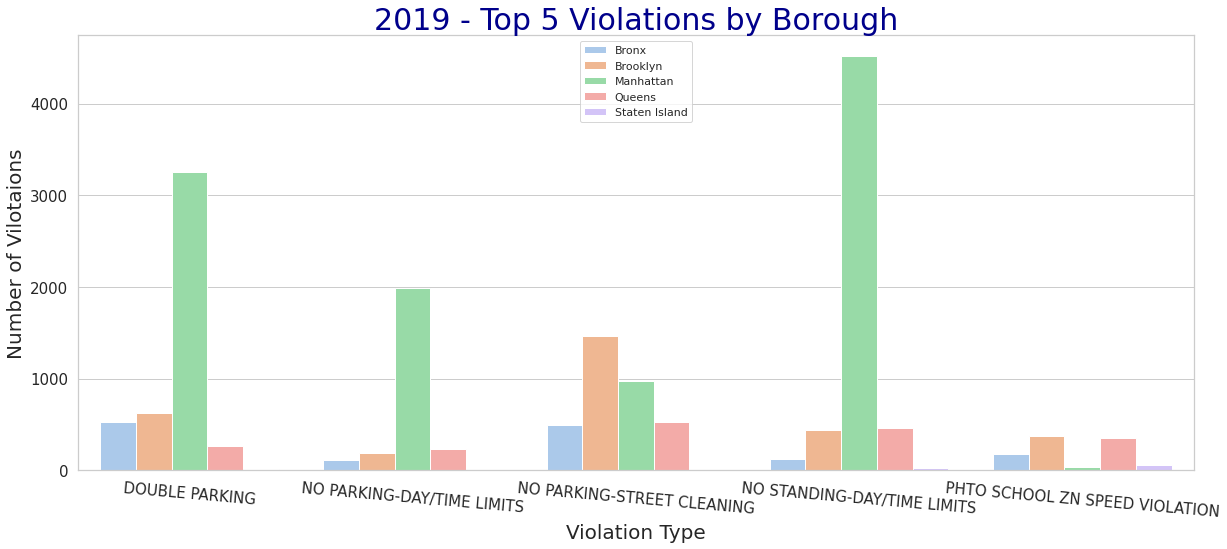

In [42]:
#Top 5 by Borough (Count)
plt.figure(figsize=(20,8))
g=sns.barplot(x='Violation', y='Count',  hue= 'Borough', 
            palette='pastel' , ci = None,
              #filtered data to only graph 2019 top 5
             data=df_Group_A[(df_Group_A['Top_List']=='Top_5') & (df_Group_A['Year']=='2019')])

g.set_xlabel("Violation Type",fontsize=20)
g.set_ylabel("Number of Vilotaions",fontsize=20)
plt.title("2019 - Top 5 Violations by Borough" , fontsize=30, color='darkblue')
plt.legend( loc="upper center")


plt.xticks(rotation=-5,fontsize=15)
plt.yticks(rotation=-0,fontsize=15)

## 


(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000.]), <a list of 9 Text major ticklabel objects>)

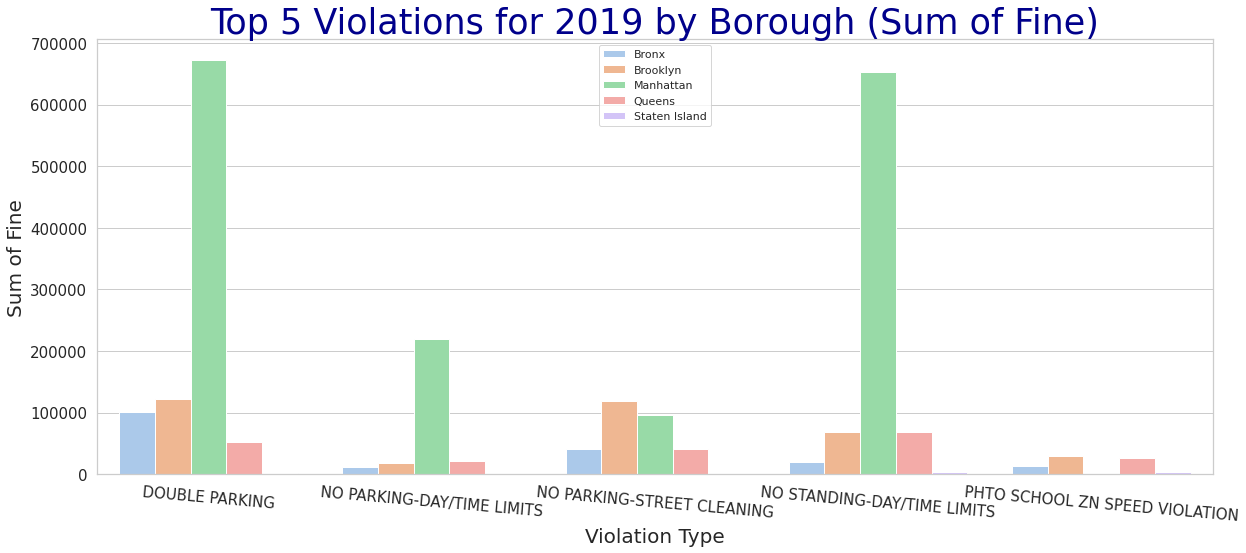

In [39]:
#Top 5 by Borough (Sum of Fine)
plt.figure(figsize=(20,8))
g=sns.barplot(x='Violation', y='Total_Fine',  hue= 'Borough', 
            palette='pastel' , ci = None,
              #filtered data to only graph 2019 top 5
             data=df_Group_A[(df_Group_A['Top_List']=='Top_5') & (df_Group_A['Year']=='2019')])

g.set_xlabel("Violation Type",fontsize=20)
g.set_ylabel("Sum of Fine",fontsize=20)
plt.title("Top 5 Violations for 2019 by Borough (Sum of Fine)" ,fontsize=35, color='darkblue')
plt.legend( loc="upper center")


plt.xticks(rotation=-5,fontsize=15)
plt.yticks(rotation=-0,fontsize=15)

##